In [1]:
import sys
sys.path.append('../src/')
from vi_hrg import *
from utils import c2d, hyperdist, p_hd, polar2cart, cart2polar
from distributions.von_mises_fisher import VonMisesFisher

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def unit_circle(x):
    x0, x1 = x.select(-1,0), x.select(-1,1)
    theta = torch.atan2(x1,x0)
    return torch.stack((theta.cos(), theta.sin()), dim=-1).squeeze()

In [3]:
π=np.pi

In [11]:
loc = torch.tensor([.0,.5])
loc_r, loc_phi = torch.tensor([1.]), torch.tensor([-π])
scale = torch.tensor([2.])
polar2cart(loc_r, loc_phi)

tensor([-1.0000e+00,  8.7423e-08])

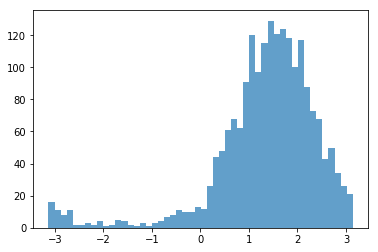

In [34]:
dist = VonMisesFisher(unit_circle(loc), scale)
samples = dist.rsample(2000)
alpha = 0.7
bins=50
r, theta = cart2polar(samples[:,0], samples[:,1])
plt.hist(theta, alpha=alpha, bins=bins)
#plt.hist(samples[:,0], alpha=alpha, bins=bins)
#plt.hist(samples[:,1], alpha=alpha, bins=bins)
plt.show()

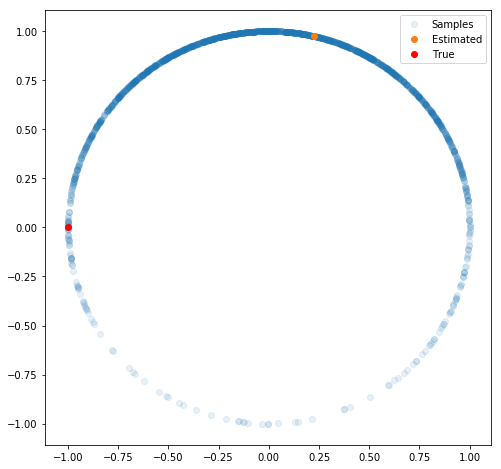

In [35]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(samples[:,0], samples[:,1], alpha=0.1, label='Samples')
#plt.scatter(samples[:,0].mean(), samples[:,1].mean(), alpha=0.7)
p2c_est = polar2cart(r.mean(), (theta).mean())
p2c_true = polar2cart(loc_r, loc_phi)
plt.scatter(p2c_est[0], p2c_est[1], alpha=1, label='Estimated')
plt.scatter(p2c_true[0], p2c_true[1], alpha=1, color='r', label='True')
plt.legend()
plt.show()

In [7]:
ϵ=π/120
dist.log_prob(torch.stack((polar2cart(loc_r, torch.tensor([-π-ϵ])),polar2cart(loc_r, torch.tensor([-π+ϵ])))))

tensor([-0.6626, -0.6626])

In [64]:
torch.stack((polar2cart(loc_r, torch.tensor([-π-ϵ])),polar2cart(loc_r, torch.tensor([-π+ϵ]))))

tensor([[-0.9997,  0.0262],
        [-0.9997, -0.0262]])

In [48]:
ratio = 4
grads = torch.arange(-π, π, π/ratio)
scale_ = torch.tensor([20.])
#p2c_ = polar2cart(torch.ones([ratio*2]), grads)
#fig = plt.figure(figsize=(8, 8))
#plt.scatter(p2c_[:,0], p2c_[:,1], alpha=1)
#plt.show()

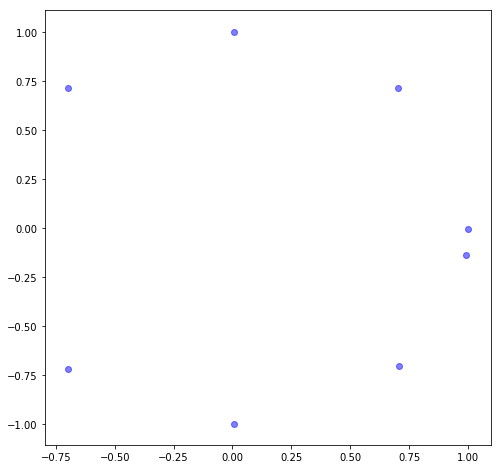

In [50]:
fig = plt.figure(figsize=(8, 8))
for g in grads:
    dist = VonMisesFisher(polar2cart(loc_r, g), scale_)
    samples = dist.rsample(1000)
    r, theta = cart2polar(samples[:,0], samples[:,1])
    p2c_est = polar2cart(r.mean(), (theta).mean())
    p2c_true = polar2cart(loc_r, g)
    plt.scatter(p2c_est[0], p2c_est[1], alpha=0.5, color='blue', label='Estimated')
    #plt.scatter(p2c_true[0], p2c_true[1], alpha=0.5, color='r', label='True')
plt.show()

In [11]:
samples

tensor([[-0.6974,  0.7167],
        [ 0.8160,  0.5780],
        [ 0.7679,  0.6406],
        ...,
        [-0.9179,  0.3968],
        [ 0.3565,  0.9343],
        [-0.8949,  0.4463]])

In [129]:
len(loc.shape)

1

In [273]:
phi_i = 10
phi_j = torch.arange(-10.,10., 0.05)
x = phi_i-phi_j

In [274]:
potsdam = x.cos()
wiki = (np.pi - (x.abs() - np.pi).abs()).cos()
sum(wiki - potsdam)

tensor(-2.2945e-05)

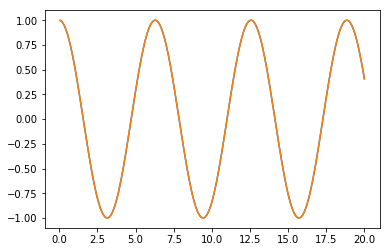

In [275]:
plt.plot(x.numpy(), potsdam.numpy())
plt.plot(x.numpy(), wiki.numpy())

In [51]:
torch.__version__

'1.1.0'

In [30]:
unit_circle(torch.tensor([2.,2.]))

tensor([0.7071, 0.7071])

In [33]:
rndom = torch.rand([10,2])*10-5
cn = unit_circle(rndom)
cn

tensor([[ 0.1164, -0.9932],
        [ 0.0068,  1.0000],
        [ 0.7199, -0.6940],
        [ 0.9866,  0.1629],
        [ 0.5034, -0.8640],
        [ 0.9746,  0.2241],
        [ 0.4255, -0.9050],
        [ 0.7625, -0.6470],
        [-0.9430,  0.3329],
        [-0.9991, -0.0432]])

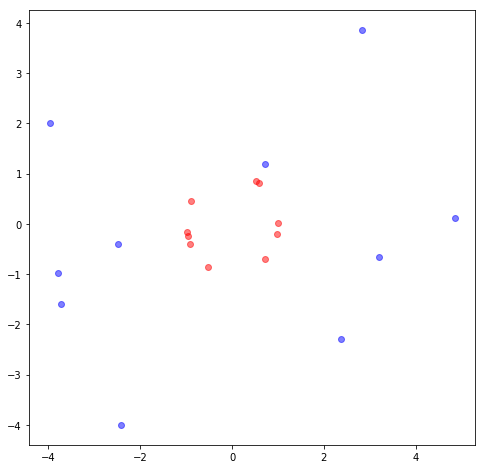

In [32]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(rndom[:,0], rndom[:,1], alpha=0.5, color='blue')
plt.scatter(cn[:,0], cn[:,1], alpha=0.5, color='r', label='True')
plt.show()